In [1]:
import qdpm
import numpy as np
import matplotlib.pyplot as plt
from qutip import identity, Qobj, tensor, basis, ket2dm
from qutip.qip.operations import rx, ry, cphase, rz
from itertools import product

# Free Evolution CZ Gate

In [2]:
qpt_exp = qdpm.Experiment(r'D:\QPG\toTongyu\QPT\Free evolution CZ\2021_01_22_00_33_18')

In [13]:
qpt_exp.data[0][0]

58

In [15]:
preparation = [identity(2),
               rx(np.pi),
               ry(np.pi/2),
               ry(-np.pi/2),
               rx(-np.pi/2),
               rx(np.pi/2)]

rotation = [ry(np.pi/2),
            rx(-np.pi/2),
            identity(2)]

init_state = [basis(2, 0), basis(2, 0)]
theory_gate = cphase(np.pi)
print(theory_gate)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


In [16]:
tomo_CZ = qdpm.ProcessTomography(qpt_exp, init_state, preparation, rotation, theory_gate)

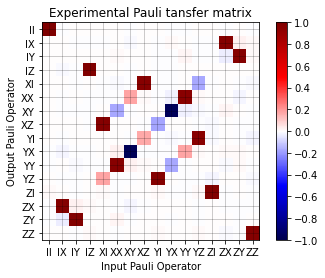

In [17]:
fig, ax = plt.subplots()
fig, ax, img = tomo_CZ.plot(ax=ax)
ax.set_title('Experimental Pauli tansfer matrix')
fig.colorbar(img, ticks=np.linspace(-1, 1, 11))
fig.savefig(qpt_exp.path.joinpath('Experimental Pauli tansfer matrix.png'))
plt.show()

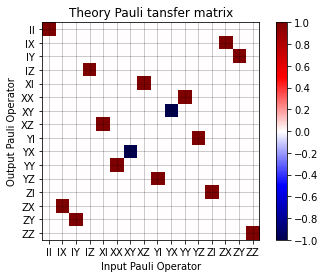

In [18]:
fig, ax = plt.subplots()
fig, ax, img = tomo_CZ.plot_theory(ax=ax)
ax.set_title('Theory Pauli tansfer matrix')
fig.colorbar(img, ticks=np.linspace(-1, 1, 11))
fig.savefig(qpt_exp.path.joinpath('Theory Pauli tansfer matrix.png'))
plt.show()

In [19]:
tomo_CZ.fidelity

0.9780149705685922

In [20]:
tomo_CZ.purity

0.9694861376416718

In [21]:
from scipy.io import loadmat
import pickle

In [41]:
sim_CZ = loadmat(r'D:\QPG\toTongyu\Master Equation Simulation\MasterEqSimulatedRMatrix_CZ.mat')['R_master_eq_simulated_CZ']
# sim_CNOT = loadmat(r'O:\68707\BF2222\LABVIEWdata\Cooldown20200119_Nb_SWIPHT_MB_W8_180nm\heterodyne\QPT\SWIPHT CNOT\2020_01_25_03_21_30_A_120_ts_5.3\MasterEqSimulatedRMatrix_CNOT.mat')['R_master_eq_simulated_CNOT']
sim_CNOT = loadmat(r'D:\QPG\toTongyu\Master Equation Simulation\MasterEqSimulatedRMatrix_CNOT.mat')['R_master_eq_simulated_CNOT']

# sim_CNOT = pickle.load(open(r'O:\68707\Tongyu Zhao\Codes\Python\Master Equation Simulation\MasterEqSimulatedRMatrix.p', 'rb'))
R_CNOT_exp = loadmat(r'D:\QPG\toTongyu\QPT\SWIPHT CNOT\2021_02_22_16_17_42_A_120_ts_5.4\R_MLE.mat')['R_gate_mle']
R_CNOT_theory = loadmat(r'D:\QPG\toTongyu\QPT\SWIPHT CNOT\2021_02_22_16_17_42_A_120_ts_5.4\R_MLE.mat')['R_theory']

# SWIPHT CNOT Gate

In [23]:
# qpt_CNOT = qdpm.Experiment(r'O:\68707\BF2222\LABVIEWdata\Cooldown20200119_Nb_SWIPHT_MB_W8_180nm\heterodyne\QPT\SWIPHT CNOT\2020_01_25_03_21_30_A_120_ts_5.3')
qpt_CNOT = qdpm.Experiment(r'D:\QPG\toTongyu\QPT\SWIPHT CNOT\2021_02_22_16_17_42_A_120_ts_5.4')


In [24]:
preparation = [identity(2),
               rx(np.pi),
               ry(np.pi/2),
               ry(-np.pi/2),
               rx(-np.pi/2),
               rx(np.pi/2)]

rotation = [ry(np.pi/2),
            rx(-np.pi/2),
            identity(2)]

init_state = [basis(2, 0), basis(2, 0)]



In [25]:
def theory_CNOT_gate(phi, theta):
    return tensor(np.exp(1j*theta)*ket2dm(basis(2, 0)), rx(np.pi))+tensor(ket2dm(basis(2, 1)), rz(phi))

In [26]:
tomo = qdpm.ProcessTomography(qpt_CNOT, init_state, preparation, rotation, theory_CNOT_gate(0, 0))

In [27]:
phi = np.linspace(-np.pi/4, np.pi/4, 21)
theta = np.linspace(-np.pi/4, np.pi/4, 21)
fidelity = np.zeros((21, 21))


In [28]:
for i, j in product(range(21), repeat=2):
    fidelity[i, j] = qdpm.ProcessTomography(qpt_CNOT, init_state, preparation, rotation, theory_CNOT_gate(phi[i], theta[j])).fidelity

In [29]:
max_fidelity_index = fidelity.argmax()

In [30]:
max_idx = np.unravel_index(fidelity.argmax(), fidelity.shape)

In [31]:
fidelity[max_idx[0], max_idx[1]]

0.9455095582706529

In [32]:
print(f'{max_idx}')

(14, 10)


In [33]:
phi[15]

0.39269908169872414

In [34]:
theta[9]

-0.07853981633974483

In [35]:
tomo_max = qdpm.ProcessTomography(qpt_CNOT, init_state, preparation, rotation, theory_CNOT_gate(phi[max_idx[0]], theta[max_idx[1]]))

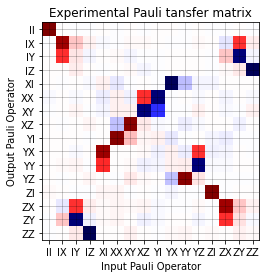

In [36]:
fig, ax = plt.subplots()
tomo_max.plot(ax=ax)
ax.set_title('Experimental Pauli tansfer matrix')
fig.savefig(qpt_CNOT.path.joinpath('Experimental Pauli tansfer matrix.png'))
plt.show()

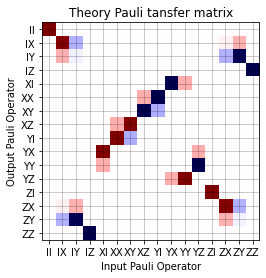

In [37]:
fig, ax = plt.subplots()
tomo_max.plot_theory(ax=ax)
ax.set_title('Theory Pauli tansfer matrix')
fig.savefig(qpt_CNOT.path.joinpath('Theory Pauli tansfer matrix.png'))
plt.show()

In [38]:
tomo_max.fidelity

0.9455095582706529

In [39]:
tomo_max.purity

0.9553987143165917

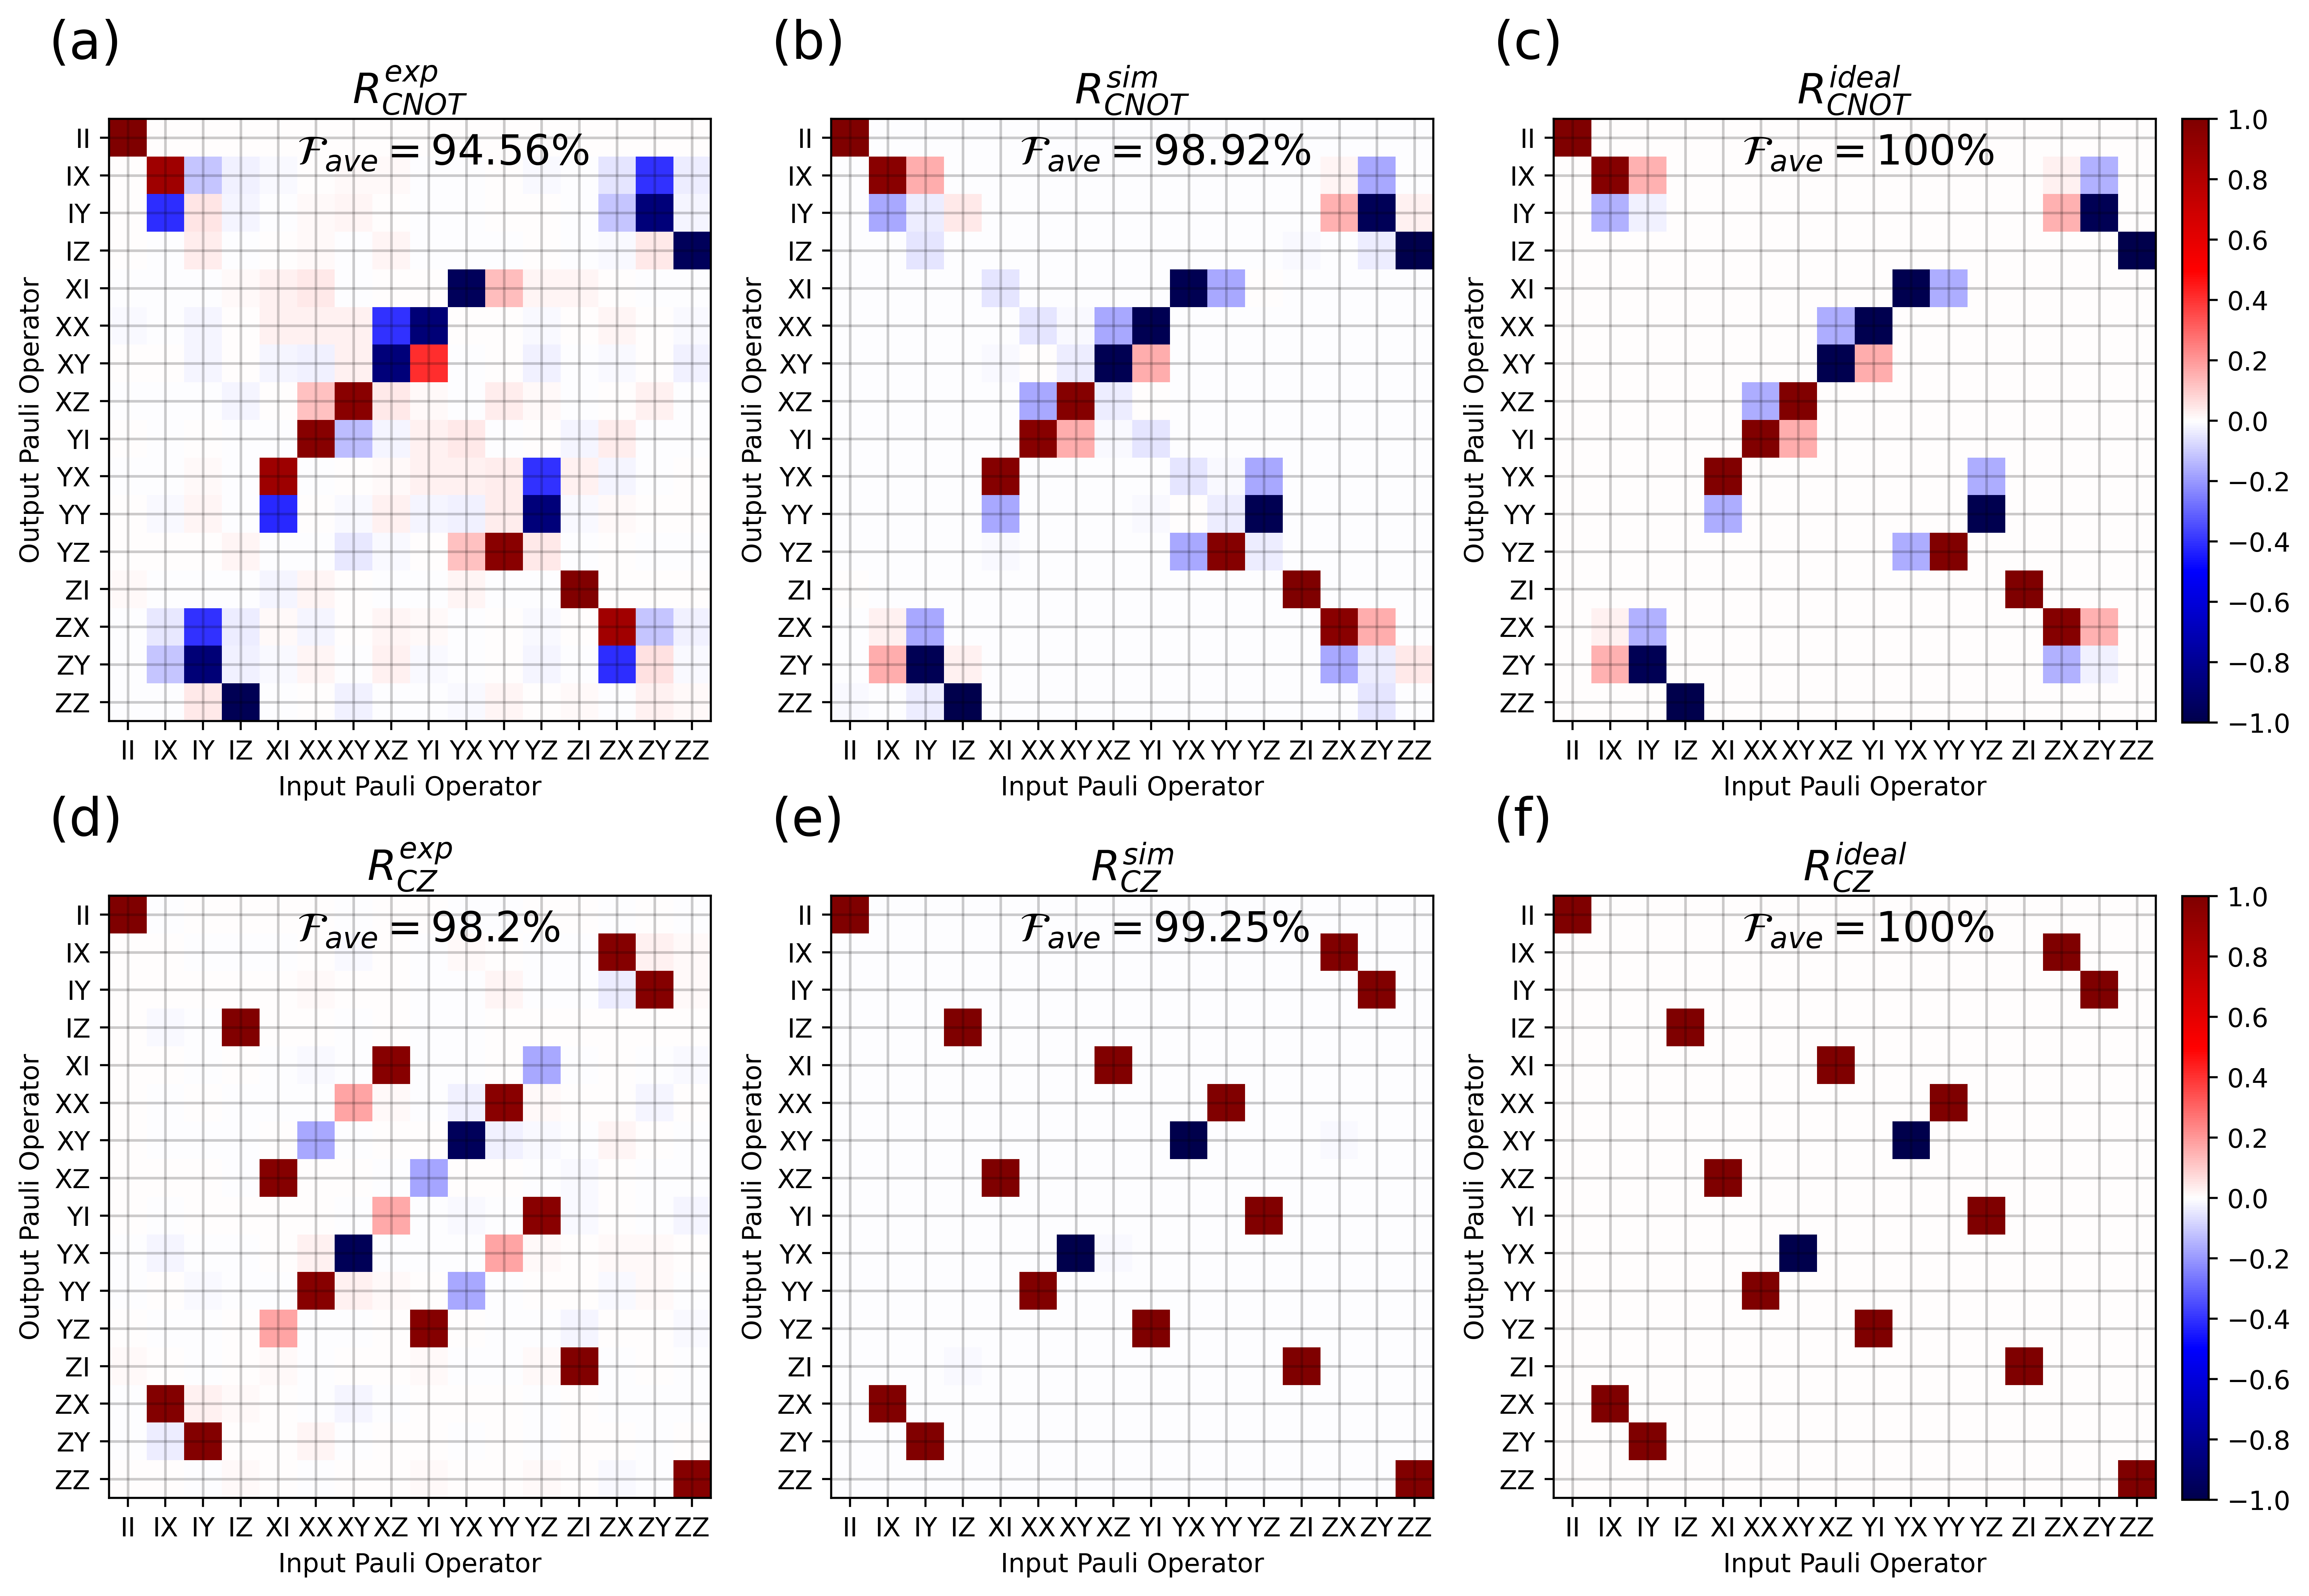

In [43]:
import string
ticklabel = []
for idx in product('IXYZ', repeat=2):
    ticklabel.append(''.join(map(str, idx)))

fig, ax = plt.subplots(2, 3, figsize=(14, 10), dpi=500)
tomo_CZ.plot(ax=ax[1, 0])
_, _, img_CZ = tomo_CZ.plot_theory(ax=ax[1, 2])

# tomo_max.plot(ax=ax[0, 0])
# _, _, img_CNOT = tomo_max.plot_theory(ax=ax[0, 2])

img_CNOT = ax[0, 0].imshow(R_CNOT_exp, cmap='seismic')
ax[0, 0].set_xticks(range(16))
ax[0, 0].set_yticks(range(16))
ax[0, 0].set_xticklabels(ticklabel, fontsize=10)
ax[0, 0].set_yticklabels(ticklabel, fontsize=10)
ax[0, 0].set_xlabel('Input Pauli Operator')
ax[0, 0].set_ylabel('Output Pauli Operator')
ax[0, 0].grid(color='k', alpha=0.2, linestyle='-', linewidth=1)

ax[0, 1].imshow(sim_CNOT, cmap='seismic')
ax[0, 1].set_xticks(range(16))
ax[0, 1].set_yticks(range(16))
ax[0, 1].set_xticklabels(ticklabel, fontsize=10)
ax[0, 1].set_yticklabels(ticklabel, fontsize=10)
ax[0, 1].set_xlabel('Input Pauli Operator')
ax[0, 1].set_ylabel('Output Pauli Operator')
ax[0, 1].grid(color='k', alpha=0.2, linestyle='-', linewidth=1)

ax[0, 2].imshow(R_CNOT_theory, cmap='seismic')
ax[0, 2].set_xticks(range(16))
ax[0, 2].set_yticks(range(16))
ax[0, 2].set_xticklabels(ticklabel, fontsize=10)
ax[0, 2].set_yticklabels(ticklabel, fontsize=10)
ax[0, 2].set_xlabel('Input Pauli Operator')
ax[0, 2].set_ylabel('Output Pauli Operator')
ax[0, 2].grid(color='k', alpha=0.2, linestyle='-', linewidth=1)

cb_ax2 = fig.add_axes([.91,.548,.01,.32])
fig.colorbar(img_CNOT, ticks=np.linspace(-1, 1, 11), cax=cb_ax2)
img_CNOT.set_clim(-1, 1)

ax[1, 1].imshow(sim_CZ, cmap='seismic')
ax[1, 1].set_xticks(range(16))
ax[1, 1].set_yticks(range(16))
ax[1, 1].set_xticklabels(ticklabel, fontsize=10)
ax[1, 1].set_yticklabels(ticklabel, fontsize=10)
ax[1, 1].set_xlabel('Input Pauli Operator')
ax[1, 1].set_ylabel('Output Pauli Operator')
ax[1, 1].grid(color='k', alpha=0.2, linestyle='-', linewidth=1)
cb_ax = fig.add_axes([.91,.136,.01,.32])
fig.colorbar(img_CZ, ticks=np.linspace(-1, 1, 11), cax=cb_ax)
img_CZ.set_clim(-1, 1)

ax[0, 0].set_title(r'$R_{CNOT}^{exp}$', fontsize=16)
ax[0, 1].set_title(r'$R_{CNOT}^{sim}$', fontsize=16)
ax[0, 2].set_title(r'$R_{CNOT}^{ideal}$', fontsize=16)

ax[1, 0].set_title(r'$R_{CZ}^{exp}$', fontsize=16)
ax[1, 1].set_title(r'$R_{CZ}^{sim}$', fontsize=16)
ax[1, 2].set_title(r'$R_{CZ}^{ideal}$', fontsize=16)

ax[0, 0].annotate(rf'$\mathcal{{F}}_{{ave}}=94.56\%$', xy=(1, 1), xytext=(4.5, 0.7), fontsize=16)
ax[0, 1].annotate(rf'$\mathcal{{F}}_{{ave}}=98.92\%$', xy=(1, 1), xytext=(4.5, 0.7), fontsize=16)
ax[0, 2].annotate(rf'$\mathcal{{F}}_{{ave}}=100\%$', xy=(1, 1), xytext=(4.5, 0.7), fontsize=16)

ax[1, 0].annotate(rf'$\mathcal{{F}}_{{ave}}=98.2\%$', xy=(1, 1), xytext=(4.5, 0.7), fontsize=16)
ax[1, 1].annotate(rf'$\mathcal{{F}}_{{ave}}=99.25\%$', xy=(1, 1), xytext=(4.5, 0.7), fontsize=16)
ax[1, 2].annotate(rf'$\mathcal{{F}}_{{ave}}=100\%$', xy=(1, 1), xytext=(4.5, 0.7), fontsize=16)


ax[0, 0].text(-0.1, 1.1, '(a)', transform=ax[0, 0].transAxes, size=20)
ax[0, 1].text(-0.1, 1.1, '(b)', transform=ax[0, 1].transAxes, size=20)
ax[0, 2].text(-0.1, 1.1, '(c)', transform=ax[0, 2].transAxes, size=20)
ax[1, 0].text(-0.1, 1.1, '(d)', transform=ax[1, 0].transAxes, size=20)
ax[1, 1].text(-0.1, 1.1, '(e)', transform=ax[1, 1].transAxes, size=20)
ax[1, 2].text(-0.1, 1.1, '(f)', transform=ax[1, 2].transAxes, size=20)

fig.savefig(qpt_CNOT.path.joinpath('QPT_results.png'), bbox_inches='tight')
plt.show()

In [42]:
(np.matmul(sim_CNOT.T, tomo_max.R_theory).trace()/4 + 1)/(4 + 1)

0.9532675779287892